In [1]:
import pickle

import numpy as np
import requests

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

import matplotlib.pyplot as plt

# 1. Generate Data

### 1.1 Visualize Data
* The generated data are clearly separatable

In [2]:
X, y = datasets.make_moons(n_samples=40000, noise=0.3, random_state=666)

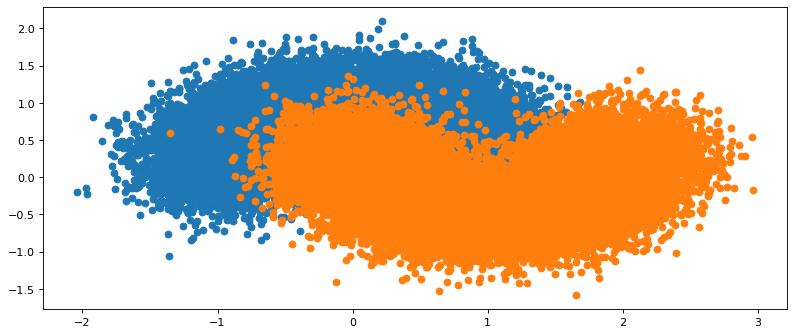

In [3]:
plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 1.2 Data Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)

In [5]:
X_train[0:10]

array([[-0.09571896,  0.7951372 ],
       [ 0.36681515, -0.58997336],
       [-0.41513914,  1.01267454],
       [-1.21136028,  0.32995157],
       [ 0.77106769, -0.01251617],
       [-0.51515441,  0.43146998],
       [-0.00368091,  1.0346998 ],
       [-1.2924137 ,  0.55039158],
       [ 1.10758029,  0.21558626],
       [ 0.29271246, -0.13410123]])

In [6]:
with open('train_0.pkl', 'wb') as f:
    pickle.dump(X_train[0:10000], f, protocol=2)
    
with open('train_1.pkl', 'wb') as f:
    pickle.dump(X_train[10000:20000], f, protocol=2)
    
with open('train_2.pkl', 'wb') as f:
    pickle.dump(X_train[20000:], f, protocol=2)
    
with open('label_0.pkl', 'wb') as f:
    pickle.dump(y_train[0:10000], f, protocol=2)
    
with open('label_1.pkl', 'wb') as f:
    pickle.dump(y_train[10000:20000], f, protocol=2)
    
with open('label_2.pkl', 'wb') as f:
    pickle.dump(y_train[20000:], f, protocol=2)

In [7]:
# with open('train_0.pkl', 'rb') as f:
#     x = pickle.load(f)

# 2. Train and Test with One Model

In [8]:
with open('train_0.pkl', 'rb') as f:
    train_0 = pickle.load(f)
    
with open('train_1.pkl', 'rb') as f:
    train_1 = pickle.load(f) 

with open('train_2.pkl', 'rb') as f:
    train_2 = pickle.load(f) 

with open('label_0.pkl', 'rb') as f:
    label_0 = pickle.load(f)
    
with open('label_1.pkl', 'rb') as f:
    label_1 = pickle.load(f) 

with open('label_2.pkl', 'rb') as f:
    label_2 = pickle.load(f) 

In [9]:
train = np.concatenate((train_0, train_1, train_2), axis=0)
train.shape

(30000, 2)

In [10]:
label = np.concatenate((label_0, label_1, label_2), axis=0)
label.shape

(30000,)

In [11]:
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=666, n_jobs=-1)
rf_clf.fit(train, label)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=666)

In [12]:
yhat = rf_clf.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.909


# 3. Train with Mutiple Models and Test with the Combined Model

### 3.1 Train Mutiple Models Respectively on Splited Training Data

In [13]:
rf_clf1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=666, n_jobs=-1)
rf_clf1.fit(train_0, label_0)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=666)

In [14]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=666, n_jobs=-1)
rf_clf2.fit(train_1, label_1)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=666)

In [15]:
rf_clf3 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=666, n_jobs=-1)
rf_clf3.fit(train_2, label_2)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=666)

### 3.2 Combine Models and Test
* 0.908 (combined) vs 0.909 (original). The accuracy is almost the same 

In [22]:
def combine_rfs(rfs):
    rf_a = rfs[0]
    for rf in rfs[1:]:
        rf_a.estimators_ += rf.estimators_
        rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a

In [23]:
rf_list = [rf_clf1, rf_clf2, rf_clf3]
new_rf_clf = combine_rfs(rf_list)
new_rf_clf

RandomForestClassifier(max_leaf_nodes=16, n_estimators=2500, n_jobs=-1,
                       random_state=666)

In [24]:
yhat = new_rf_clf.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.908


# 4. Download the Generated Combined Model and Test
* The same accuracy as that done in the notebook

In [25]:
model_url = 'https://storage.googleapis.com/distributed-randomforest/combined_model.pkl'

In [26]:
model_pkl = requests.get(model_url).content
model = pickle.loads(model_pkl)

In [27]:
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.908
